In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

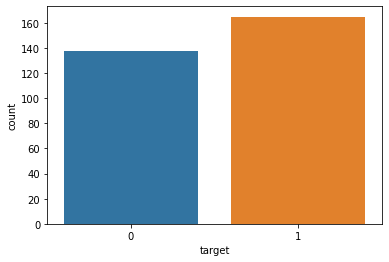

In [9]:
sns.countplot(x =df['target'])

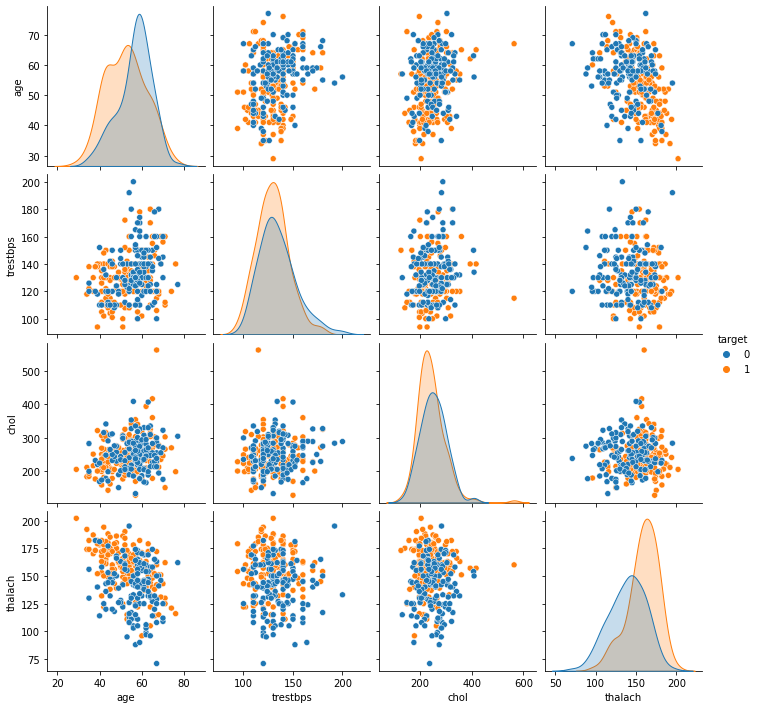

In [16]:
df_for_pairplot = df[['age','trestbps', 'chol','thalach','target']]
sns.pairplot(df_for_pairplot, hue = 'target')

<AxesSubplot:>

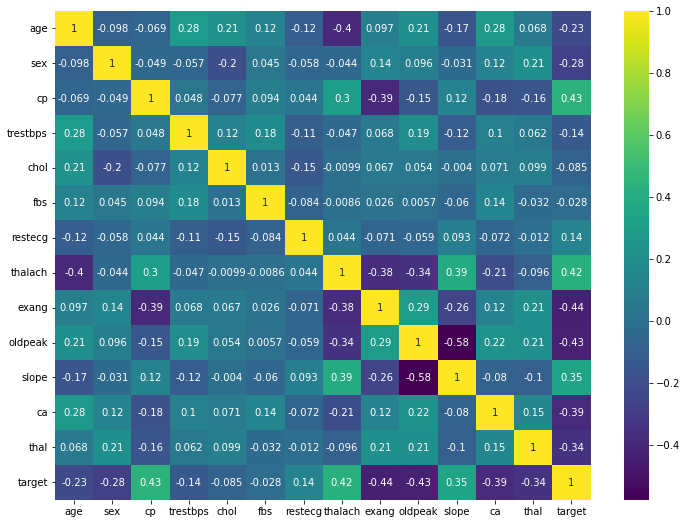

In [19]:
plt.figure(figsize=(12,9))

sns.heatmap(df.corr(), annot = True, cmap='viridis')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis = 1)
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Dokładność: 82.0%
Raport:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.80      0.91      0.85        43

    accuracy                           0.82        76
   macro avg       0.82      0.80      0.81        76
weighted avg       0.82      0.82      0.81        76



''

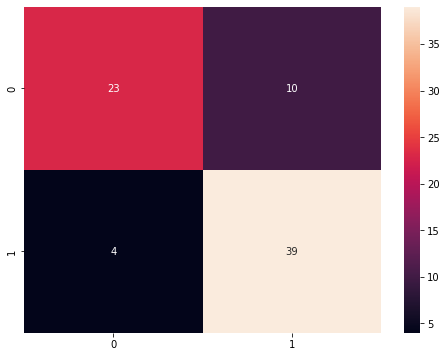

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (8, 6))
model = LogisticRegression(C = 2)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g' )
;

In [23]:
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [0.1,0.2, 0.5, 1,2,3,4, 10, 100],
}

gs = GridSearchCV(LogisticRegression(), params, cv = 3)
gs.fit(X_train,y_train)
gs.best_params_

{'C': 2}

Dokładność: 80.0%
Raport:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.80      0.86      0.83        43

    accuracy                           0.80        76
   macro avg       0.80      0.79      0.80        76
weighted avg       0.80      0.80      0.80        76



''

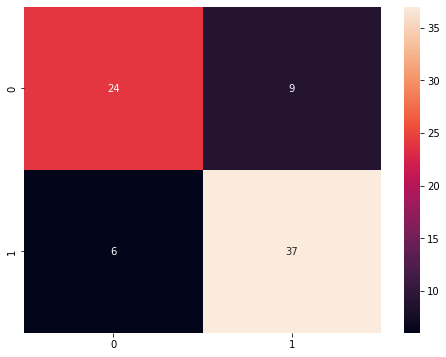

In [27]:
from sklearn.svm import SVC

plt.figure(figsize = (8, 6))
model = SVC(C = 1, gamma = 0.1)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

In [28]:
params = {
    'C' : [0.1,0.2, 0.5, 1,2,3,4,5, 10, 100],
    'gamma' : [1,0.5, 0.1,0.01,0.001]
}

gs = GridSearchCV(SVC(), params, cv = 3)
gs.fit(X_train,y_train)
gs.best_params_

{'C': 1, 'gamma': 0.1}

Dokładność: 80.0%
Raport:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.79      0.88      0.84        43

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.79        76
weighted avg       0.80      0.80      0.80        76



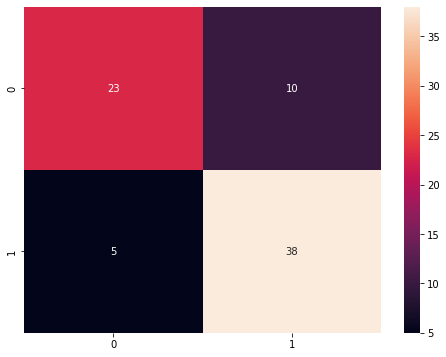

In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plt.figure(figsize = (8, 6))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 80.0%
Raport:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        33
           1       0.83      0.81      0.82        43

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



''

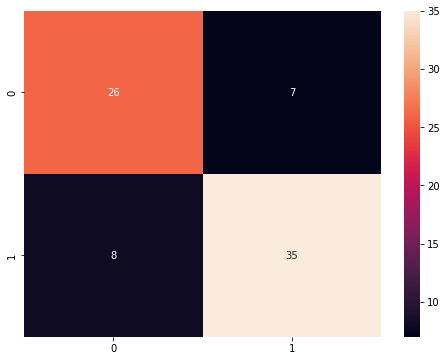

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (8,6))
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

Dokładność: 82.0%
Raport:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.82      0.86      0.84        43

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



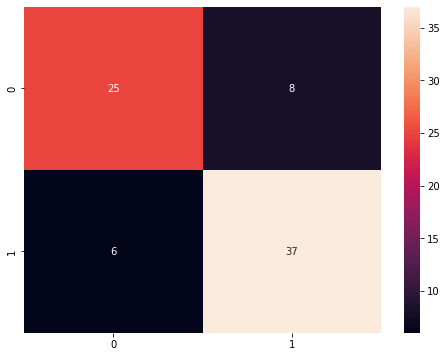

In [72]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(n_estimators = 50, max_depth = 7, max_leaves =4 )
plt.figure(figsize = (8,6))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

<AxesSubplot:>

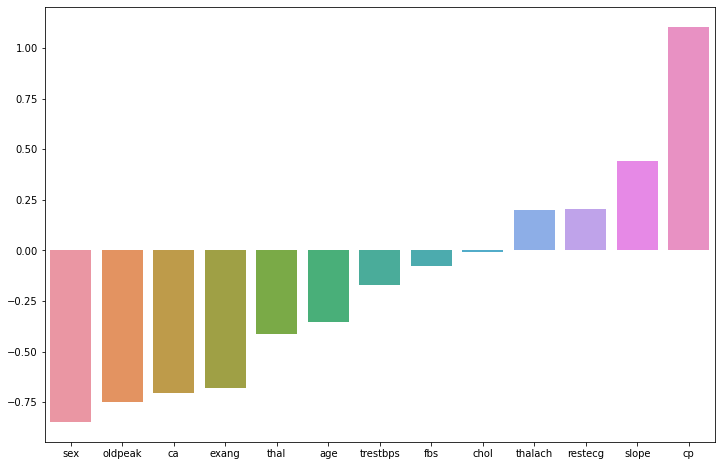

In [64]:
# Dla regr log
plt.figure(figsize = (12,8))

coefs = pd.Series(index = X.columns, data = model.coef_[0])
coefs = coefs.sort_values()
sns.barplot(x =coefs.index, y=coefs.values)

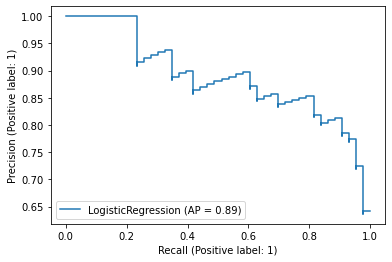

In [67]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

plot_precision_recall_curve(model, X_test, y_test)

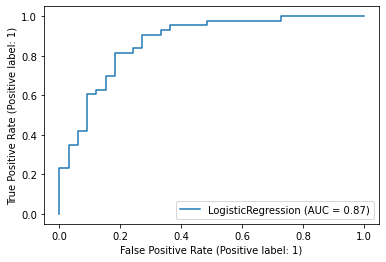

In [68]:
plot_roc_curve(model, X_test, y_test)

In [69]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [73]:
model.predict(patient)

array([0])

In [76]:
model.predict_proba(patient)

array([[1.00000000e+00, 1.02100146e-11]])